<h2>Importing libraries</h2>
Now we're going to add some libraries for feature extraction

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#Keras

<h2>Dataset creating</h2>
CSV file's header:

In [ ]:
header = 'filename spectral_centroid zcr spec_bw rolloff rms'
for i in range(1, 41):
    header += f' mfcc{i}'

for i in range(1, 13):
    header += f' octave{i}'

for i in range(1, 129):
    header += f' mel_based_spectr{i}'

for i in range(1, 8):
    header += f' contrast{i}'

for i in range(1, 7):
    header += f' tonnetz{i}'
#header += ' label'
header = header.split()

Let's extract some features

It's a long process - don't run it without strong necessary

(file <i>dataset.csv</i> has already included

In [ ]:
file = open('dataset_most_advanced.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

    for filename in os.listdir(f'./Set1/WAV'):
        songname = f'./Set1/WAV/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
        melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr),axis=1)
        contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)        
        tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr), axis=1)
        
        rms = np.mean(librosa.feature.rms(y=y))
        spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40),axis=1)
        to_append = f'{filename} {spec_cent} {zcr} {spec_bw} {rolloff} {rms}'
        for e in mfcc:
            to_append += f' {e}'

        for e in chroma_stft:
            to_append += f' {e}'

        for e in melspectrogram:
            to_append += f' {e}'

        for e in contrast:
            to_append += f' {e}'

        for e in tonnetz:
            to_append += f' {e}'

        file = open('dataset_most_advanced.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [10]:
songname = f'./Set1/WAV/001.wav'
y, sr = librosa.load(songname, mono=True)
chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr),axis=1)
contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr), axis=1)

rms = np.mean(librosa.feature.rms(y=y))
spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
zcr = np.mean(librosa.feature.zero_crossing_rate(y))
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40),axis=1)
to_append = f'{filename} {spec_cent} {zcr} {spec_bw} {rolloff} {rms}'
for e in mfcc:
    to_append += f' {e}'

for e in chroma_stft:
    to_append += f' {e}'

for e in melspectrogram:
    to_append += f' {e}'

for e in contrast:
    to_append += f' {e}'

for e in tonnetz:
    to_append += f' {e}'

to_append

'360.wav 1767.3911880115347 0.1090264423076923 1796.3165075464324 3337.9115084134614 0.08911171555519104 -158.8653106689453 119.88406372070312 -34.78178024291992 35.453556060791016 -0.4711099863052368 13.612735748291016 -13.087447166442871 -2.130436420440674 -5.94347620010376 1.2900221347808838 -4.343043804168701 8.76695442199707 -2.563502788543701 2.6661150455474854 -6.926175594329834 -1.8208589553833008 -3.1124794483184814 -0.40902090072631836 -0.6334847211837769 -3.9117178916931152 -13.163094520568848 -3.587712526321411 3.296884775161743 7.3778791427612305 -8.394342422485352 0.9735252261161804 3.650728225708008 -1.7580268383026123 -7.112412929534912 1.4295746088027954 7.670943737030029 4.171741962432861 -7.656267166137695 -0.08655668050050735 2.8358962535858154 4.196702003479004 0.12097449600696564 -2.2904152870178223 -3.214600086212158 -0.9122324585914612 0.16223131120204926 0.4179844260215759 0.46491679549217224 0.23377934098243713 0.2623509168624878 0.16766729950904846 0.28474482

<h2>Preprocessing dataset</h2>

In [11]:
librosaData = pd.read_csv('dataset_most_advanced.csv')
filenames = librosaData['filename']
librosaData.drop(['filename'],axis=1, inplace=True)
librosaData.head()

scalerLibrosa = MinMaxScaler()
librosa_scaled = scalerLibrosa.fit_transform(X=librosaData)
print(librosa_scaled.shape)

(360, 198)


<h2>Clustering into groups</h2>

In [12]:
n_clusters = 6
clusters = KMeans(n_clusters=n_clusters, random_state=0).fit(librosa_scaled)
clusters.labels_

array([1, 4, 4, 1, 2, 4, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 3, 1,
       4, 0, 0, 4, 1, 1, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 2, 4, 4, 0, 1,
       4, 1, 0, 4, 4, 4, 0, 4, 4, 4, 1, 1, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0,
       4, 4, 4, 1, 0, 4, 0, 0, 4, 0, 1, 4, 4, 0, 4, 1, 1, 0, 4, 4, 4, 0,
       0, 1, 2, 1, 4, 0, 3, 3, 3, 3, 1, 0, 4, 1, 1, 4, 1, 4, 0, 2, 3, 3,
       2, 0, 3, 1, 3, 3, 4, 4, 4, 0, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 3,
       3, 1, 1, 3, 3, 3, 1, 3, 4, 3, 1, 0, 4, 0, 4, 1, 4, 4, 4, 4, 2, 2,
       0, 3, 0, 3, 2, 1, 0, 2, 4, 1, 1, 4, 3, 1, 3, 1, 0, 3, 3, 4, 1, 0,
       4, 1, 0, 4, 0, 4, 1, 1, 1, 4, 0, 1, 4, 4, 1, 2, 2, 1, 0, 1, 4, 2,
       2, 1, 4, 2, 1, 0, 1, 2, 2, 1, 1, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 2, 4, 1, 5, 3, 3, 0, 3, 4, 0, 4, 1, 3, 1, 5, 2,
       3, 4, 3, 4, 2, 1, 3, 1, 5, 1, 1, 2, 3, 4, 3, 1, 0, 3, 3, 4, 1, 3,
       0, 1, 3, 1, 1, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 1, 1, 0,
       0, 4, 4, 0, 1, 0, 0, 0, 0, 4, 4, 0, 4, 4, 2,

<h2>Decreasing feature size for visualisation</h2>

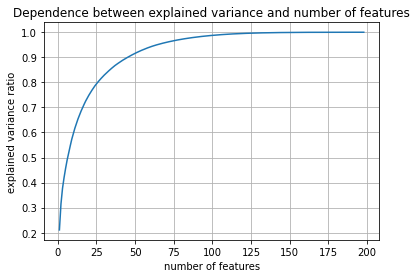

In [16]:
pca = PCA(n_components=3)

plotGroups = pca.fit_transform(librosa_scaled)
centers = pca.transform(clusters.cluster_centers_)
#print(pca.explained_variance_ratio_)

expVar = []
for i in range(1, 199):
    pca1 = PCA(n_components=i)
    pca1.fit_transform(librosa_scaled)
    expVar.append(pca1.explained_variance_ratio_.sum())
plt.plot(range(1, 199), expVar)

plt.xlabel('number of features')
plt.ylabel('explained variance ratio')
plt.title('Dependence between explained variance and number of features')
plt.grid(True)

<h2>2d visualisation</h2>

Text(0.5, 1.0, 'created clusters')

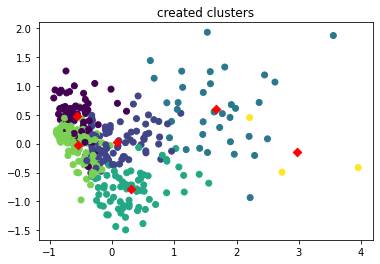

In [17]:
plt.scatter(plotGroups[:,0], plotGroups[:,1], c=clusters.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color = 'red')
plt.title('created clusters')

<h2>3d visualisation</h2>

In [18]:
#Make Plotly figure
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=plotGroups[:,0],
                    y=plotGroups[:,1],
                    z=plotGroups[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=5,
                                color=clusters.labels_,
                                #colorscale = 'HSV',
                                line=dict (width=1)),
                    text=filenames,
                    line=dict (width=5),
                    mode='markers')

fig2 = go.Scatter3d(x=centers[:,0],
                    y=centers[:,1],
                    z=centers[:,2],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                size=8,
                                color=list(range(1,n_clusters+1)),
                                #colorscale = 'IceFire',
                                line=dict(width=10)),
                    text=list(range(1,n_clusters+1)),

                    mode='markers')
#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="1 feature"),
                                yaxis=dict(title="2 feature"),
                                zaxis=dict(title="3 feature")),)

#Plot and save html
plotly.offline.plot({"data": [fig1, fig2],
                     "layout": mylayout},
                     auto_open=True,
                     filename="3DPlot.html")



'3DPlot.html'

In [19]:
from sklearn.metrics import silhouette_score

silhouette_score(librosa_scaled, clusters.labels_)




0.058953272268476395